In [ ]:
!wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

In [ ]:
import numpy as np
import thinkdsp
from scipy.io.wavfile import write, read
import matplotlib.pyplot as plt
import scipy.signal

In [ ]:
# Number of partials
num_partials = 10

# Generate Fourier coefficients for A4 (440 Hz)
a = np.zeros(num_partials)
b = np.zeros(num_partials)
a[0] = 1.0
for n in range(1, num_partials):
    a[n] = 2.0 / (n*np.pi)

In [ ]:
a = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
a

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

<ipython-input-18-f1c83423bc06>:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(a,use_line_collection=False)


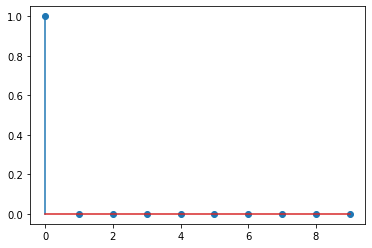

In [ ]:
plt.stem(a,use_line_collection=False)
plt.show()

In [ ]:
# Sampling rate and duration of the sound
fs = 44100
duration = 1.0

# Time array
t = np.linspace(0, duration, int(duration*fs))

# Initialize output signal
y = np.zeros(len(t))

# Add up the individual sinusoidal waves
for n in range(num_partials):
    y += a[n] * np.sin(2*np.pi*(n+1)*440*t) + b[n] * np.cos(2*np.pi*(n+1)*440*t)

In [ ]:
# Save the sound as a WAV file
write('test.wav', fs, y)

In [ ]:
# Number of partials
num_partials = 10

# Generate Fourier coefficients for A4 (440 Hz)
a = np.random.uniform(-1,1,(100,))
b = np.random.uniform(-1,1,(100,))

# Create a Fourier synthesis wave
harmonics = []
for n in range(num_partials):
    freq = (n+1) * 440
    amp = a[n]
    phase = b[n]
    harmonics.append(thinkdsp.SinSignal(freq, amp, phase))

# Create a composite signal from the harmonics
wave = thinkdsp.SumSignal(*harmonics)

# Set the duration of the sound
duration = 1.0

# Generate the waveform
waveform = wave.make_wave(duration=duration, start=0, framerate=44100)
waveform.write('test2.wav')

Writing test2.wav


In [ ]:
plt.plot(f)

# Testing Fourier Transform on a Simple Sine Wave

In [ ]:
# Define the duration of the signal in seconds
duration = 3

In [ ]:
# Define the sample rate in samples per second
sample_rate = 44100

In [ ]:
# Calculate the number of samples in the signal
num_samples = duration * sample_rate
num_samples

132300

In [ ]:
# Create an array of time values for the signal
times = np.linspace(0, duration, num_samples)
times

array([0.00000000e+00, 2.26759084e-05, 4.53518167e-05, ...,
       2.99995465e+00, 2.99997732e+00, 3.00000000e+00])

In [ ]:
# Define the frequency of the sine wave in Hz
frequency = 440

In [ ]:
# Calculate the sine wave signal
signal = np.sin(2*np.pi*frequency*times)

In [ ]:
# Visualize the signal in time-frequency space
f, t, Sxx = scipy.signal.spectrogram(signal, sample_rate)
f.shape, t.shape, Sxx.shape

((129,), (590,), (129, 590))

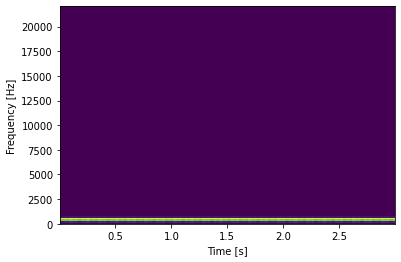

In [ ]:
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.show()

In [ ]:
# Define the number of coefficients to calculate
N = 10

In [ ]:
# Define the range of x values over which to evaluate the function
x_min = 0
x_max = 2*np.pi
x_range = x_max - x_min

In [ ]:
# Calculate the step size for the x values
dx = x_range / N
dx

0.6283185307179586

In [ ]:
# Initialize lists to store the amplitudes and phases of the coefficients
amplitudes = []
phases = []
a = []
b = []

# Calculate the Fourier coefficients
for n in range(N):
    # Initialize variables to store the real and imaginary parts of the coefficient
    real = 0
    imag = 0
    
    # Calculate the real and imaginary parts of the coefficient
    for m in range(N):
        x = x_min + m*dx
        real += signal[m] * np.cos(2*np.pi*n*m/N)
        imag -= signal[m] * np.sin(2*np.pi*n*m/N)
    
    # Divide the real and imaginary parts by N to get the coefficient
    real /= N
    imag /= N
    
    # Calculate the amplitude and phase of the coefficient
    amplitude = np.sqrt(real**2 + imag**2)
    phase = np.arctan(imag/real)
    
    # Append the amplitude and phase to the lists
    a.append(imag)
    b.append(real)
    amplitudes.append(amplitude)
    phases.append(phase)

In [ ]:
amplitudes, phases

In [ ]:
plt.stem(amplitudes,use_line_collection=False)

In [ ]:
# Number of partials
num_partials = 100

# Create a Fourier synthesis wave
harmonics = []
for n in range(num_partials):
    freq = (n+1) * 440
    amp = a[n]
    phase = b[n]
    harmonics.append(thinkdsp.SinSignal(freq, amp, phase))

# Create a composite signal from the harmonics
wave = thinkdsp.SumSignal(*harmonics)

# Set the duration of the sound
duration = 1.0

# Generate the waveform
waveform = wave.make_wave(duration=duration, start=0, framerate=44100)
waveform.write('test2.wav')

Writing test2.wav


/content/thinkdsp.py:1173: UserWarning: Warning: normalizing before quantizing.
  warnings.warn("Warning: normalizing before quantizing.")


In [ ]:
signal = read('test2.wav')
len(signal)

2

In [ ]:
# Visualize the signal in time-frequency space
f, t, Sxx = scipy.signal.spectrogram(signal[1], sample_rate)
f.shape, t.shape, Sxx.shape

((129,), (196,), (129, 196))

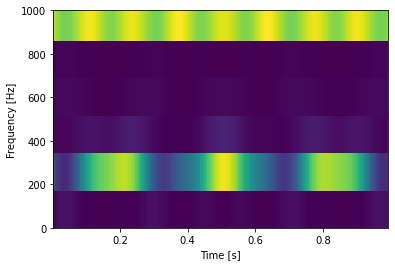

In [ ]:
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.ylim(0,1000)
plt.show()
